In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')

<h1>UK ROAD ACCIDENT DATA ANALYSIS</h1>
<h2>INCLUSIVE YEAR 2019 - 2022</h2>
<h3>Analyst: Concha, Vaughn Allystair P.</h3>

In [2]:
accident = pd.read_csv("datasets//accident_data.csv")

In [3]:
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [4]:
accident.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,660654.000000,660653.000000,660679.000000,660679.000000
mean,52.553866,-1.431210,1.357040,1.831255
std,1.406922,1.383330,0.824847,0.715269
min,49.914430,-7.516225,1.000000,1.000000
25%,51.490690,-2.332291,1.000000,1.000000
50%,52.315641,-1.411667,1.000000,2.000000
75%,53.453452,-0.232869,1.000000,2.000000
max,60.757544,1.762010,68.000000,32.000000


In [5]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [6]:
for column in["Accident_Severity","Latitude", "Light_Conditions", "District Area", 
           "Longitude", "Road_Surface_Conditions", "Road_Type", "Urban_or_Rural_Area",
          "Weather_Conditions", "Vehicle_Type"]:
    accident[column] = accident[column].astype('category')

accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], dayfirst = True, errors = "coerce")

In [7]:
accident.isnull().sum()

Index                           0
Accident_Severity               0
Accident Date              395672
Latitude                       25
Light_Conditions                0
District Area                   0
Longitude                      26
Number_of_Casualties            0
Number_of_Vehicles              0
Road_Surface_Conditions       726
Road_Type                    4520
Urban_or_Rural_Area            15
Weather_Conditions          14128
Vehicle_Type                    0
dtype: int64

In [8]:
accident['Latitude'] = accident['Latitude'].fillna(accident['Latitude'].mode()[0])
accident['Longitude'] = accident['Longitude'].fillna(accident['Longitude'].mode()[0])
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].fillna(accident['Road_Surface_Conditions'].mode()[0])
accident['Road_Type'] = accident['Road_Type'].fillna(accident['Road_Type'].mode()[0])
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].fillna(accident['Urban_or_Rural_Area'].mode()[0])

<h1 style="color:#2596be">Insight No. 1</h1>
<h2 style="color:pink">which of the road types has the highest number of accidents?</h2>
<h3>The road with the highest percentage of accident is the "single carriageway" which is 63.50% of all severities and road types</h3>

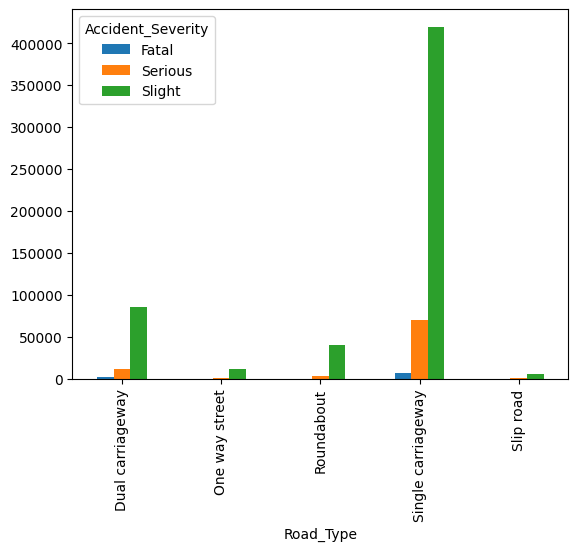

In [9]:
road_severity = accident.groupby(["Road_Type", "Accident_Severity"]).size().unstack()
road_severity.plot(kind= 'bar')
plt.show()

In [10]:
road_severity.unstack()

Accident_Severity  Road_Type         
Fatal              Dual carriageway        1815
                   One way street            95
                   Roundabout               142
                   Single carriageway      6560
                   Slip road                 49
Serious            Dual carriageway       11746
                   One way street          1655
                   Roundabout              3665
                   Single carriageway     70540
                   Slip road                611
Slight             Dual carriageway       85863
                   One way street         11809
                   Roundabout             40185
                   Single carriageway    419563
                   Slip road               6381
dtype: int64

<h1 style="color:#2596be">Insight No. 2</h1>
<h2 style="color:pink">What is the average number of casualties? </h2>
<h3>The average number of casualties is 1.4 </h3>

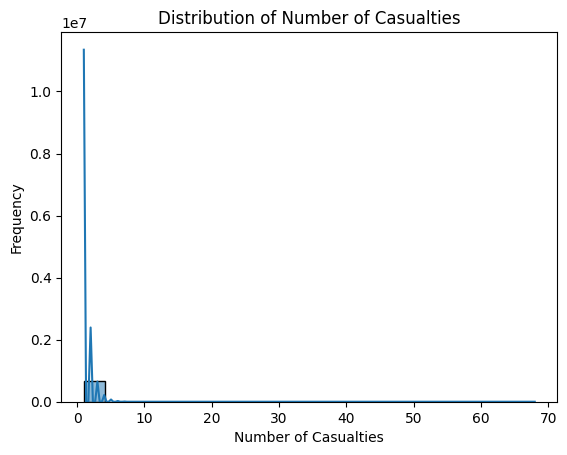

In [52]:
avg_casualties = np.round(accident['Number_of_Casualties'].mean(), 1)

sns.histplot(accident['Number_of_Casualties'], kde=True)
plt.title('Distribution of Number of Casualties')
plt.xlabel('Number of Casualties')
plt.ylabel('Frequency')
plt.show()


In [13]:
avg_casualties

np.float64(1.4)

<h1 style="color:#2596be">Insight No. 3</h1>
<h2 style="color:pink">Which area have higher number of accidents? Urban vs. Rural</h2>
<h3>The Urban has the higher number of accidents than Rural</h3>

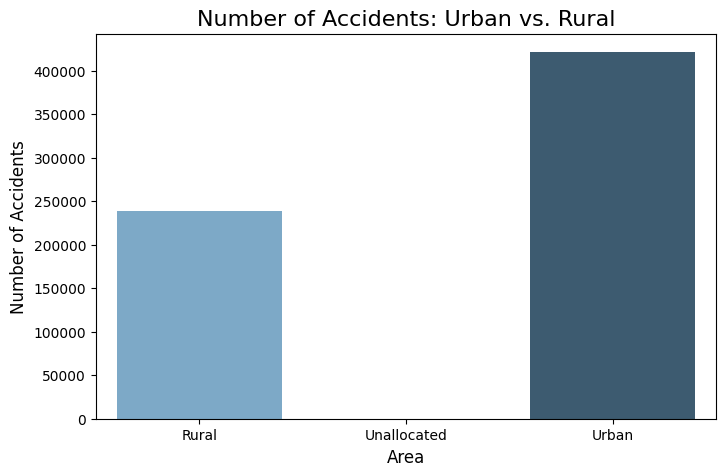

In [11]:
accident["Urban_or_Rural_Area"].value_counts()
accident_counts = accident["Urban_or_Rural_Area"].value_counts()

data = pd.DataFrame({
    'Area': accident_counts.index,
    'Accidents': accident_counts.values
})


plt.figure(figsize=(8, 5))
sns.barplot(x='Area', y='Accidents', data=data, palette='Blues_d')
plt.title('Number of Accidents: Urban vs. Rural', fontsize=16)
plt.xlabel('Area', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.show()

<h1 style="color:#2596be">Insight No. 4</h1>
<h2 style="color:pink">What is the most common accident severity ? </h2>
<h3>The most common accident severity is 'Slight'</h3>

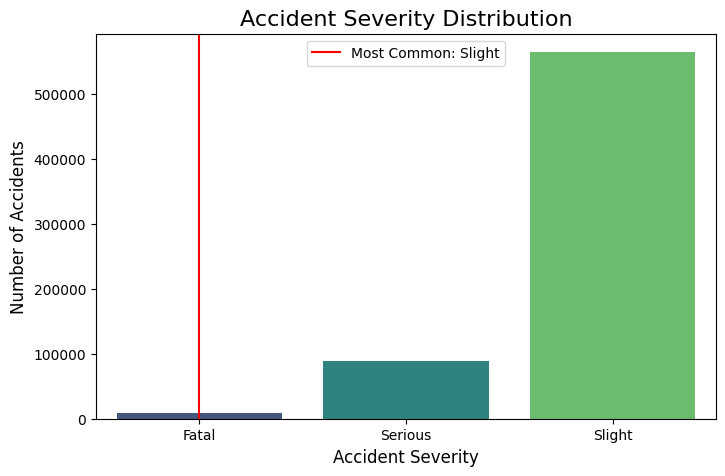

In [13]:
avg_severity = accident['Accident_Severity'].mode()[0] 
import matplotlib.pyplot as plt
import seaborn as sns


severity_counts = accident['Accident_Severity'].value_counts()
data = pd.DataFrame({
    'Severity': severity_counts.index,
    'Accidents': severity_counts.values
})

plt.figure(figsize=(8, 5))
sns.barplot(x='Severity', y='Accidents', data=data, palette='viridis')

plt.axvline(x=data[data['Severity'] == avg_severity].index[0], color='red', label=f'Most Common: {avg_severity}')

plt.title('Accident Severity Distribution', fontsize=16)
plt.xlabel('Accident Severity', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)

plt.legend()
plt.show()

In [16]:
avg_severity

'Slight'

<h1 style="color:#2596be">Insight No. 5</h1>
<h2 style="color:pink">What is the average number of vehicles in an accident? </h2>
<h3>The average number of vehicles in an accident is 1.8 </h3>

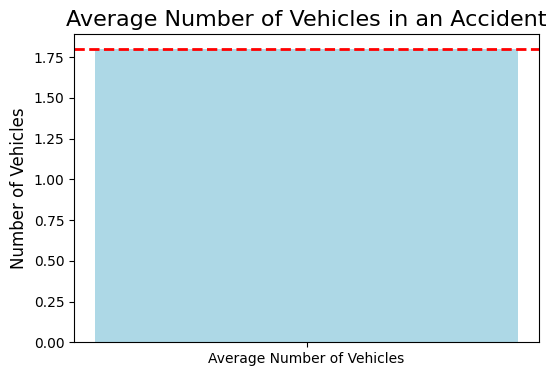

The average number of vehicles in an accident is: 1.8


In [31]:
avg_vehicles = np.round(accident['Number_of_Vehicles'].mean(), 1)

plt.figure(figsize=(6, 4))
plt.bar("Average Number of Vehicles", avg_vehicles, color='lightblue')

plt.axhline(avg_vehicles, color='red', linestyle='--', linewidth=2)
plt.title('Average Number of Vehicles in an Accident', fontsize=16)
plt.ylabel('Number of Vehicles', fontsize=12)
plt.show()

print(f"The average number of vehicles in an accident is: {avg_vehicles}")

In [18]:
avg_vehicles

np.float64(1.8)

<h1 style="color:#2596be">Insight No. 6</h1>
<h2 style="color:pink">In which area has the has the higher number of casualties?</h2>
<h3>Urban area has a higher number of casualties</h3>

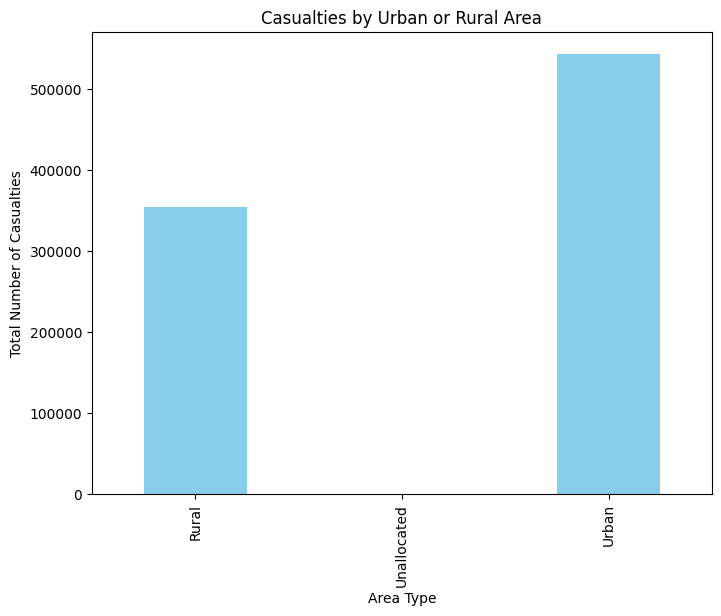

In [26]:
area_casualties = accident.groupby('Urban_or_Rural_Area')['Number_of_Casualties'].sum()

plt.figure(figsize=(8,6))
area_casualties.plot(kind='bar', color=['skyblue'])
plt.title('Casualties by Urban or Rural Area')
plt.xlabel('Area Type')
plt.ylabel('Total Number of Casualties')
plt.show()

In [20]:
area_casualties

Urban_or_Rural_Area
Rural          353515
Unallocated        13
Urban          543040
Name: Number_of_Casualties, dtype: int64

<h1 style="color:#2596be">Insight No. 7</h1>
<h2 style="color:pink">On which light conditions has the highest number of accident?</h2>
<h3>Daylight has the highest number of accidents</h3>

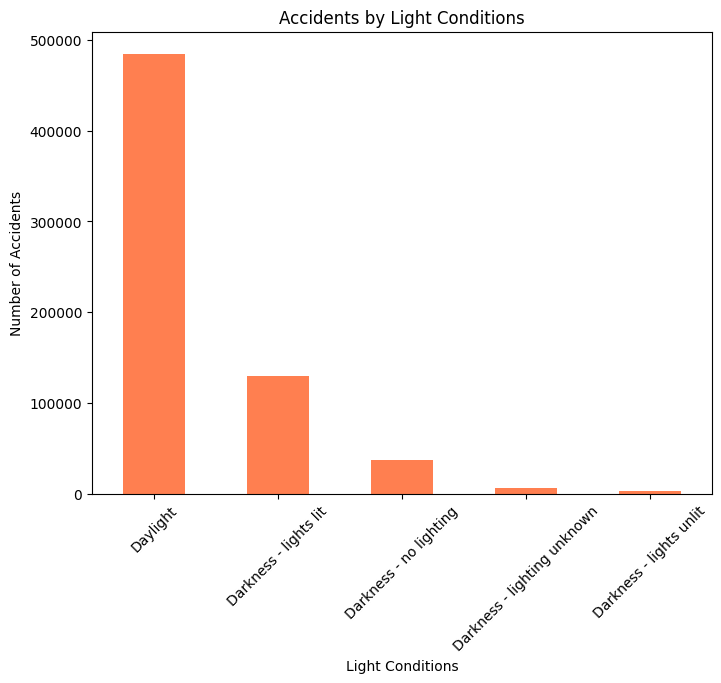

In [22]:
lightcon_accidents = accident['Light_Conditions'].value_counts()

plt.figure(figsize=(8,6))
lightcon_accidents.plot(kind='bar', color='coral')
plt.title('Accidents by Light Conditions')
plt.xlabel('Light Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

In [22]:
lightcon_accidents

Light_Conditions
Daylight                       484880
Darkness - lights lit          129335
Darkness - no lighting          37437
Darkness - lighting unknown      6484
Darkness - lights unlit          2543
Name: count, dtype: int64

<h1 style="color:#2596be">Insight No. 8</h1>
<h2 style="color:pink">On which weather conditions has the highest number of accident?</h2>
<h3>Fine no high winds has the highest number of accidents</h3>

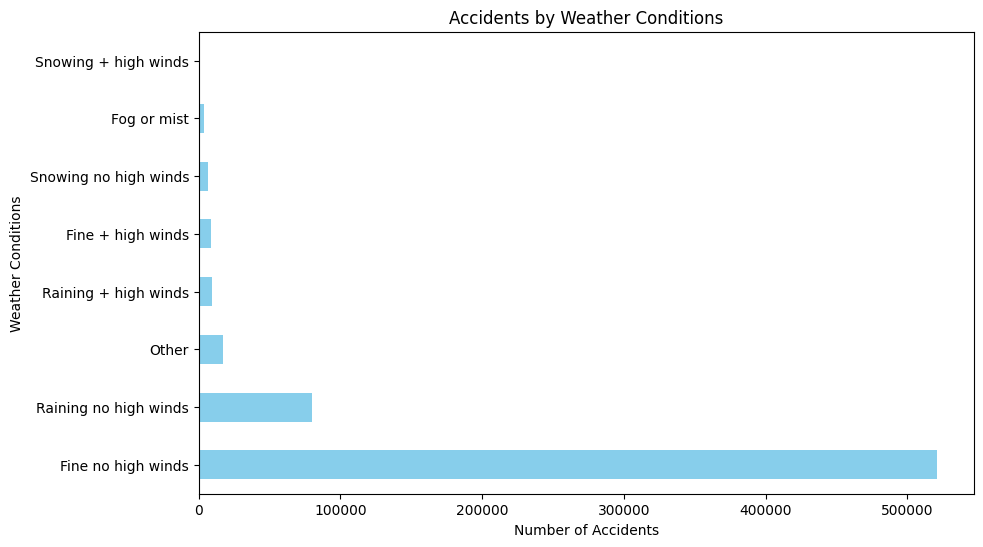

In [23]:
weatherCdt_accidents = accident['Weather_Conditions'].value_counts()

plt.figure(figsize=(10,6))
weatherCdt_accidents.plot(kind='barh', color='skyblue')
plt.title('Accidents by Weather Conditions')
plt.xlabel('Number of Accidents')
plt.ylabel('Weather Conditions')
plt.show()

In [24]:
weatherCdt_accidents

Weather_Conditions
Fine no high winds       520885
Raining no high winds     79696
Other                     17150
Raining + high winds       9615
Fine + high winds          8554
Snowing no high winds      6238
Fog or mist                3528
Snowing + high winds        885
Name: count, dtype: int64

<h1 style="color:#2596be">Insight No. 9</h1>
<h2 style="color:pink">What road type has the highest number of accident?</h2>
<h3>The road type that has the highest accident is the single carriageway</h3>

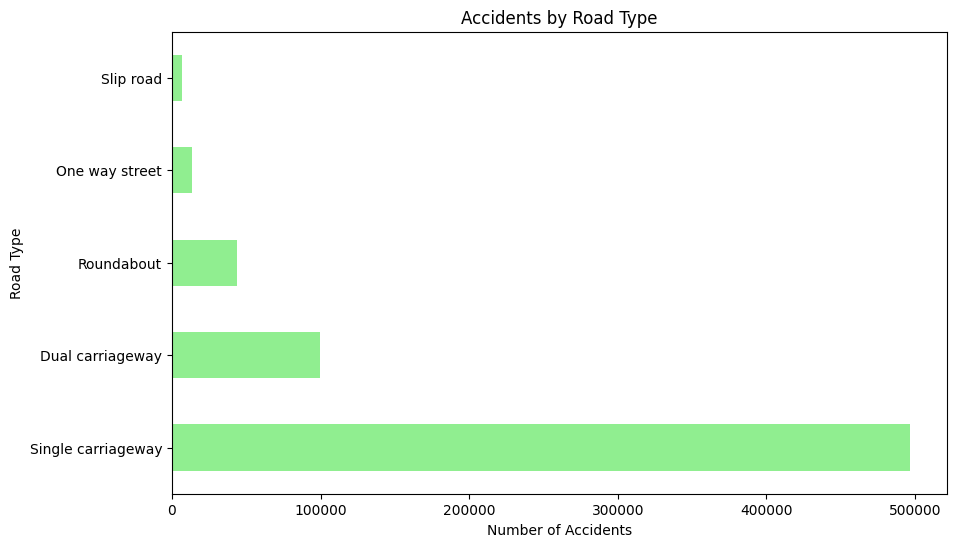

In [24]:
roadtype_accidents = accident['Road_Type'].value_counts()

plt.figure(figsize=(10,6))
roadtype_accidents.plot(kind='barh', color='lightgreen')
plt.title('Accidents by Road Type')
plt.xlabel('Number of Accidents')
plt.ylabel('Road Type')
plt.show()

In [26]:
roadtype_accidents

Road_Type
Single carriageway    496663
Dual carriageway       99424
Roundabout             43992
One way street         13559
Slip road               7041
Name: count, dtype: int64

<h1 style="color:#2596be">Insight No. 10</h1>
<h2 style="color:pink">What road surface conditions has the highest number of accident?</h2>
<h3>The road surface conditions that has the highest accident is a dry surface.</h3>

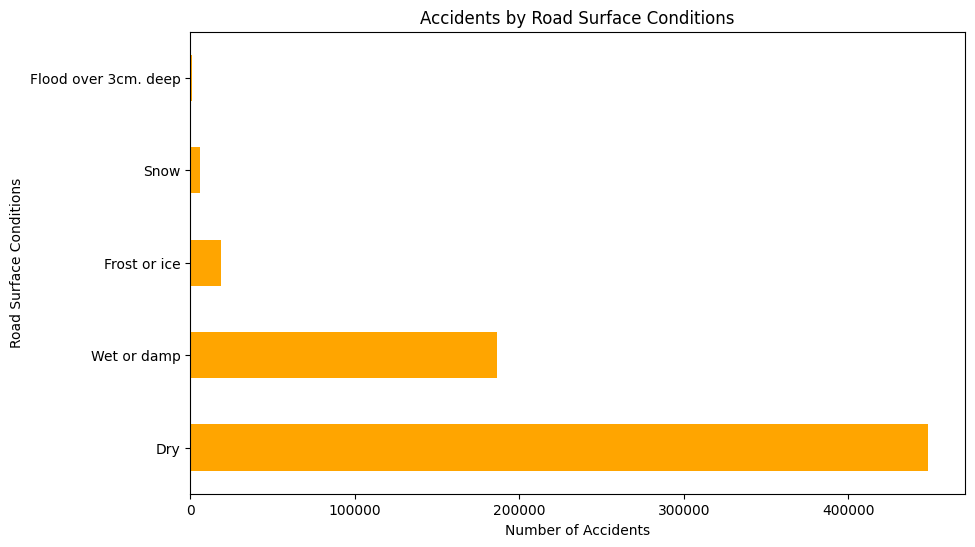

In [27]:
roadsurface_accidents = accident['Road_Surface_Conditions'].value_counts()

plt.figure(figsize=(10,6))
roadsurface_accidents.plot(kind='barh', color='orange')
plt.title('Accidents by Road Surface Conditions')
plt.xlabel('Number of Accidents')
plt.ylabel('Road Surface Conditions')
plt.show()

In [28]:
roadsurface_accidents

Road_Surface_Conditions
Dry                     448547
Wet or damp             186708
Frost or ice             18517
Snow                      5890
Flood over 3cm. deep      1017
Name: count, dtype: int64

<h1 style="color:#2596be">Insight No. 11</h1>
<h2 style="color:pink">What is the average number of casualties for each level of severity?</h2>
<h3>The average number of casualties for fatal accidents is 1.9, for the serious is 1.5 , and for the slight is 1.3.</h3>

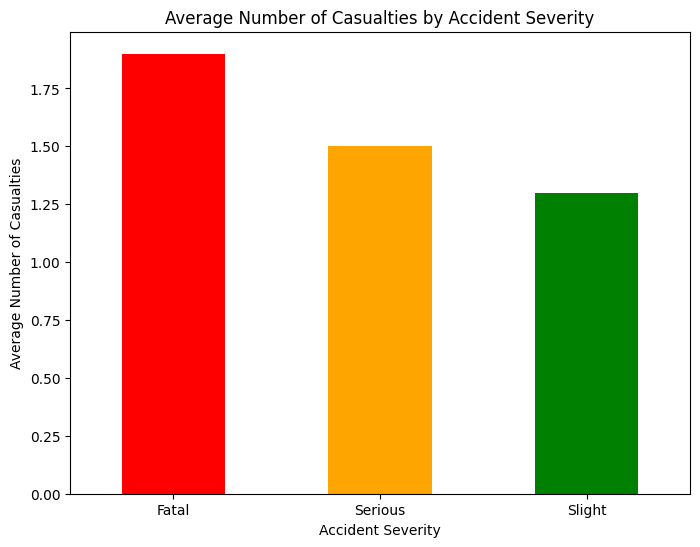

In [28]:
avg_casualties_per_severity = np.round(accident.groupby('Accident_Severity')['Number_of_Casualties'].mean(), 1)

plt.figure(figsize=(8,6))
avg_casualties_per_severity.plot(kind='bar', color=['red', 'orange', 'green'])
plt.title('Average Number of Casualties by Accident Severity')
plt.xlabel('Accident Severity')
plt.ylabel('Average Number of Casualties')
plt.xticks(rotation=0)
plt.show()

In [30]:
avg_casualties_per_severity

Accident_Severity
Fatal      1.9
Serious    1.5
Slight     1.3
Name: Number_of_Casualties, dtype: float64

<h1 style="color:#2596be">Insight No. 12</h1>
<h2 style="color:pink">What is the average number of casualties in the urban, rural and unallocated areas?</h2>
<h3>The average number of casualties for rural area accidents is 1.5, for the urban area is 1.3 , and for unallocated areas is 1.2.</h3>

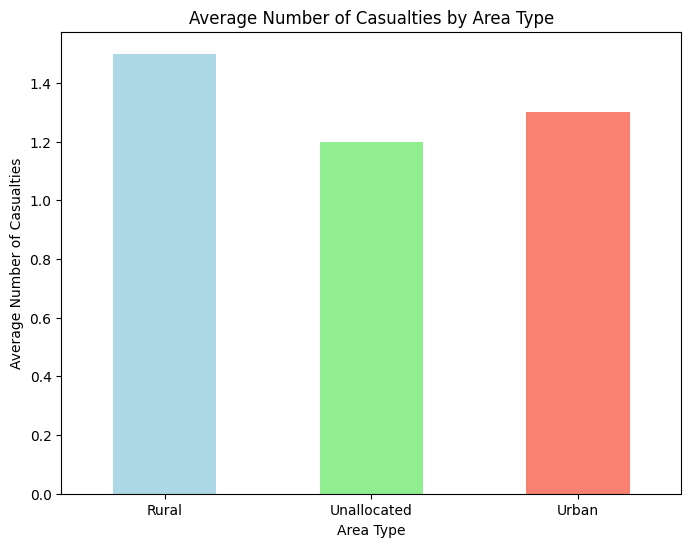

In [30]:
avg_casualties_per_area = np.round(accident.groupby('Urban_or_Rural_Area')['Number_of_Casualties'].mean(), 1)

plt.figure(figsize=(8,6))
avg_casualties_per_area.plot(kind='bar', color=['lightblue', 'lightgreen', 'salmon'])
plt.title('Average Number of Casualties by Area Type')
plt.xlabel('Area Type')
plt.ylabel('Average Number of Casualties')
plt.xticks(rotation=0)
plt.show()

In [32]:
avg_casualties_per_area

Urban_or_Rural_Area
Rural          1.5
Unallocated    1.2
Urban          1.3
Name: Number_of_Casualties, dtype: float64

<h1 style="color:#2596be">Insight No. 13</h1>
<h2 style="color:pink">Each weather conditions average number of casualties</h2>
<h3>(Fine with no winds, fine with high winds, raining with high winds, raining with no winds, snowing with high winds, and other weather conditions) have an average of 1.4 casualties, then (snowing with no high winds) has an average of 1.3 casualties, while (fog or mist) has 1.5 casualties.</h3>

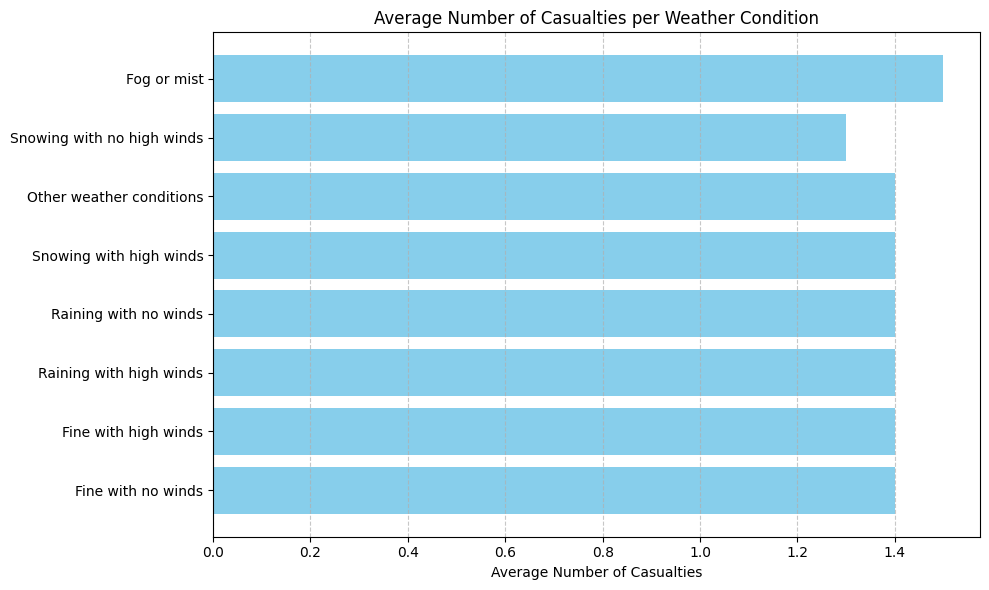

In [32]:
avg_casualties_per_weather = np.round(accident.groupby('Weather_Conditions')['Number_of_Casualties'].mean(), 1)

weather_conditions = ['Fine with no winds', 'Fine with high winds', 'Raining with high winds', 'Raining with no winds',
                      'Snowing with high winds', 'Other weather conditions', 'Snowing with no high winds', 'Fog or mist']

avg_casualties = [1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.3, 1.5]

plt.figure(figsize=(10,6))
plt.barh(weather_conditions, avg_casualties, color='skyblue')
plt.xlabel('Average Number of Casualties')
plt.title('Average Number of Casualties per Weather Condition')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [34]:
avg_casualties_per_weather

Weather_Conditions
Fine + high winds        1.4
Fine no high winds       1.4
Fog or mist              1.5
Other                    1.4
Raining + high winds     1.4
Raining no high winds    1.4
Snowing + high winds     1.4
Snowing no high winds    1.3
Name: Number_of_Casualties, dtype: float64

<h1 style="color:#2596be">Insight No. 14</h1>
<h2 style="color:pink">In which road area has the higher number of accidents?</h2>
<h3>Urban roads have a higher accidents than roads in rural areas.</h3>

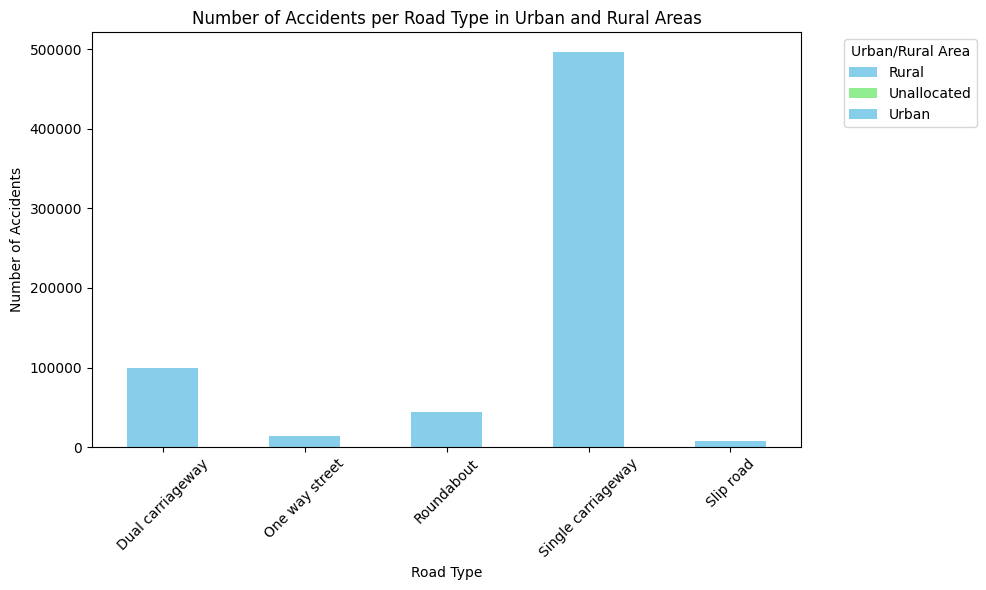

In [33]:
accidents_per_area_road = accident.groupby(['Urban_or_Rural_Area', 'Road_Type']).size().unstack().T

accidents_per_area_road.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'lightgreen'])
plt.title('Number of Accidents per Road Type in Urban and Rural Areas')
plt.xlabel('Road Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.legend(title='Urban/Rural Area', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [36]:
accidents_per_area_road

Urban_or_Rural_Area,Rural,Unallocated,Urban
Road_Type,,,
Dual carriageway,48715,1,50708
One way street,1193,0,12366
Roundabout,15545,1,28446
Single carriageway,169243,9,327411
Slip road,4294,0,2747


<h1 style="color:#2596be">Insight No. 15</h1>
<h2 style="color:pink">Which combinations of weather and light conditions result in the highest number of casualties?</h2>
<h3>Daylight and fine with no high winds have the highest number of casualties.</h3>

<Figure size 1200x2000 with 0 Axes>

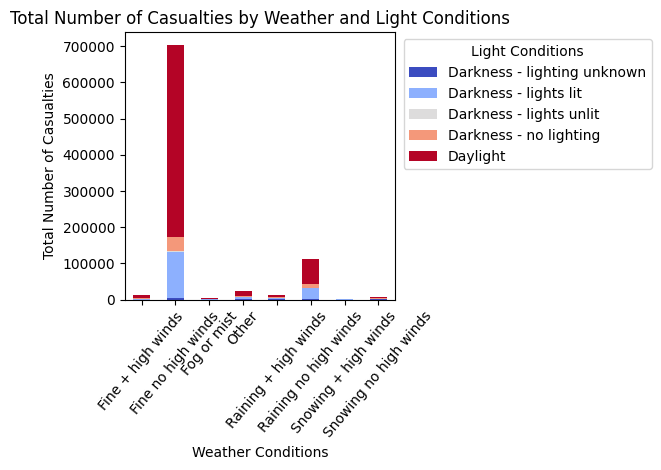

In [42]:
casualties_by_weather_light = accident.groupby(['Weather_Conditions', 'Light_Conditions'])['Number_of_Casualties'].sum().unstack()

plt.figure(figsize=(12, 20))
casualties_by_weather_light.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Total Number of Casualties by Weather and Light Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Total Number of Casualties')
plt.xticks(rotation=50)
plt.legend(title='Light Conditions', bbox_to_anchor=(1.005, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [38]:
casualties_by_weather_light

Light_Conditions,Darkness - lighting unknown,Darkness - lights lit,Darkness - lights unlit,Darkness - no lighting,Daylight
Weather_Conditions,,,,,
Fine + high winds,82,2543,75,1213,7943
Fine no high winds,4903,125686,2251,38800,531805
Fog or mist,89,1323,48,1267,2399
Other,234,6535,177,2824,13466
Raining + high winds,147,4185,115,2173,7001
Raining no high winds,808,31563,620,9538,69700
Snowing + high winds,21,354,7,247,626
Snowing no high winds,119,2411,37,1129,4674


<h1 style="color:#2596be">Insight No. 16</h1>
<h2 style="color:pink">Does having more vehicles results to more casualties?</h2>
<h3>No, having many vehicles doesn't lead to more casualties.</h3>
<h3>The number of vehicles has no correlation with the number of casualties</h3>

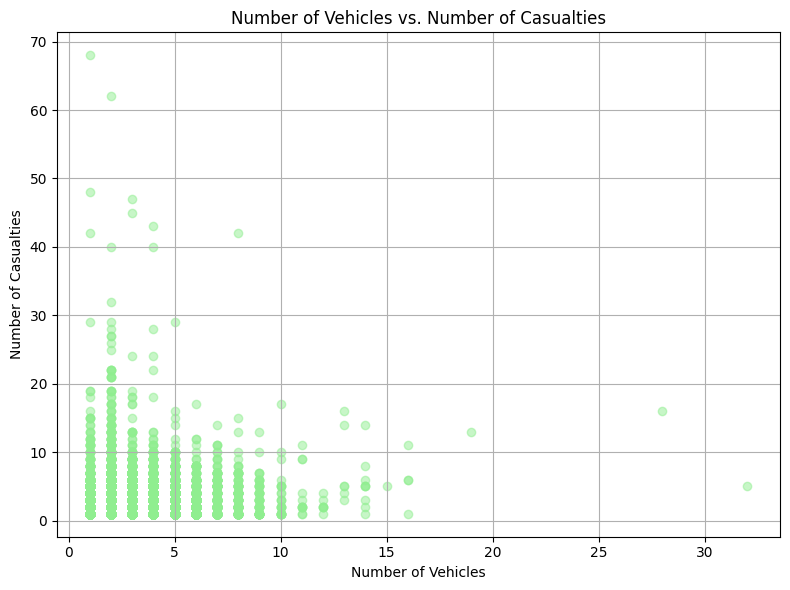

In [44]:
vehicles_casualties_corr = accident['Number_of_Vehicles'].corr(accident['Number_of_Casualties'])

plt.figure(figsize=(8, 6))
plt.scatter(accident['Number_of_Vehicles'], accident['Number_of_Casualties'], alpha=0.5, color='lightgreen')
plt.title('Number of Vehicles vs. Number of Casualties')
plt.xlabel('Number of Vehicles')
plt.ylabel('Number of Casualties')
plt.grid(True)
plt.tight_layout()
plt.show()

In [40]:
vehicles_casualties_corr

np.float64(0.22888886126927557)

<h1 style="color:#2596be">Insight No. 17</h1>
<h2 style="color:pink">What vehicle type has the highest number of accidents</h2>
<h3>A car has the highest number of accidents</h3>

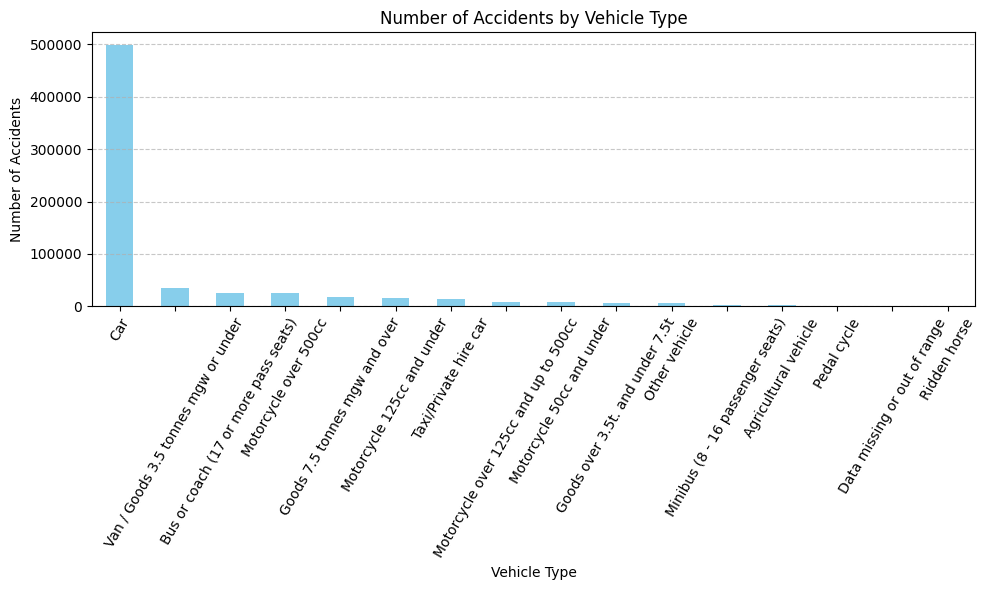

In [47]:
vehicletype_accidents = accident['Vehicle_Type'].value_counts()

plt.figure(figsize=(10, 6))
vehicletype_accidents.plot(kind='bar', color='skyblue')
plt.title('Number of Accidents by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=60)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [48]:
vehicletype_accidents

Vehicle_Type
Car                                      497992
Van / Goods 3.5 tonnes mgw or under       34160
Bus or coach (17 or more pass seats)      25878
Motorcycle over 500cc                     25657
Goods 7.5 tonnes mgw and over             17307
Motorcycle 125cc and under                15269
Taxi/Private hire car                     13294
Motorcycle over 125cc and up to 500cc      7656
Motorcycle 50cc and under                  7603
Goods over 3.5t. and under 7.5t            6096
Other vehicle                              5637
Minibus (8 - 16 passenger seats)           1976
Agricultural vehicle                       1947
Pedal cycle                                 197
Data missing or out of range                  6
Ridden horse                                  4
Name: count, dtype: int64

<h1 style="color:#2596be">Insight No. 18</h1>
<h2 style="color:pink">What district area has the highest number of accidents</h2>
<h3>Birmingham has the highest number of accidents</h3>

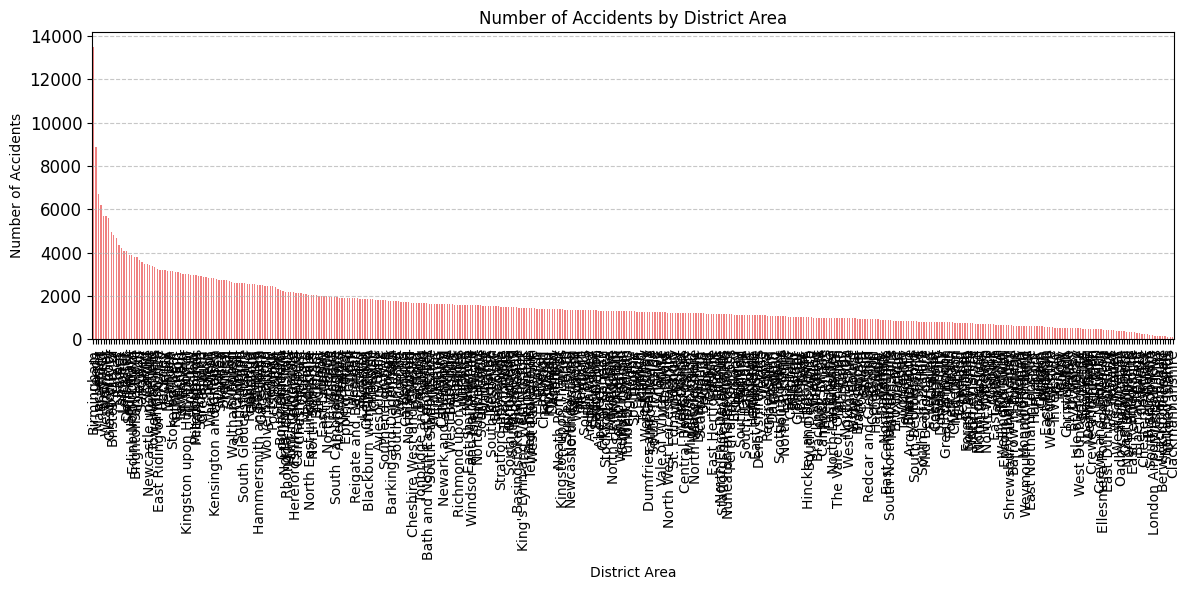

In [56]:
districtarea_accidents = accident['District Area'].value_counts()
plt.figure(figsize=(12, 6))
districtarea_accidents.plot(kind='bar', color='lightcoral')
plt.title('Number of Accidents by District Area')
plt.xlabel('District Area')
plt.ylabel('Number of Accidents')

plt.xticks(rotation=90, ha='center', fontsize=10)
plt.yticks(fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#DAMI PALA

In [44]:
districtarea_accidents

District Area
Birmingham            13491
Leeds                  8898
Manchester             6720
Bradford               6212
Sheffield              5710
                      ...  
Berwick-upon-Tweed      153
Teesdale                142
Shetland Islands        133
Orkney Islands          117
Clackmannanshire         91
Name: count, Length: 422, dtype: int64

<h1 style="color:#2596be">Insight No. 19</h1>
<h2 style="color:pink">Which district area has the highest average number of casualties?</h2>
<h3>Blaeu Gwent has the highest average number of casualties</h3>

District Area with the Highest Average Number of Casualties:
District Area
Blaeu Gwent    1.7
Name: Number_of_Casualties, dtype: float64


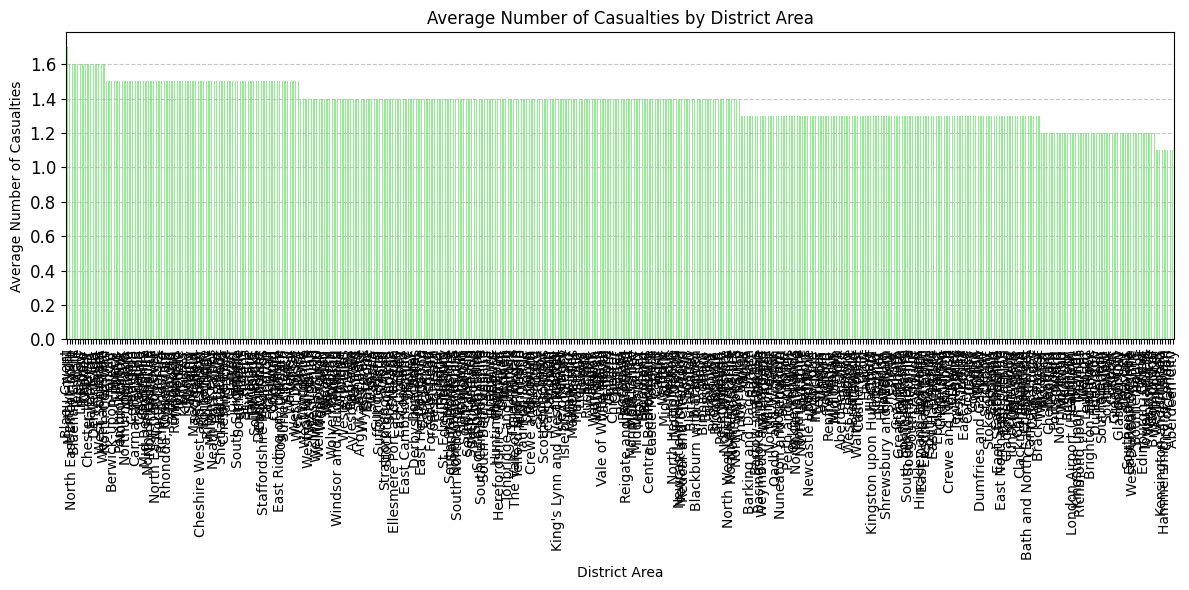

In [57]:
avg_casualties_per_district = np.round(accident.groupby('District Area')['Number_of_Casualties'].mean(), 1).sort_values(ascending = False)

print("District Area with the Highest Average Number of Casualties:")
print(avg_casualties_per_district.head(1))

plt.figure(figsize=(12, 6))
avg_casualties_per_district.plot(kind='bar', color='lightgreen')
plt.title('Average Number of Casualties by District Area')
plt.xlabel('District Area')
plt.ylabel('Average Number of Casualties')
plt.xticks(rotation=90, ha='center', fontsize=10)
plt.yticks(fontsize=12)

plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [46]:
avg_casualties_per_district

District Area
Blaeu Gwent                1.7
Merthyr Tydfil             1.6
North East Lincolnshire    1.6
Blaenau Gwent              1.6
Teesdale                   1.6
                          ... 
Kensington and Chelsea     1.1
Hammersmith and Fulham     1.1
City of London             1.1
Camden                     1.1
Aberdeen City              1.1
Name: Number_of_Casualties, Length: 422, dtype: float64

<h1 style="color:#2596be">Insight No. 20</h1>
<h2 style="color:pink">Do different road surface conditions impact the number of casualties?</h2>
<h3>The road surface conditions impact the number of casualties</h3>

<h3>There is correlation between road surface conditions and number of casualties</h3>

5.097050919646033e-249
P-value from ANOVA test: 5.097050919646033e-249
There is a significant difference in the number of casualties between dry and wet road surfaces.


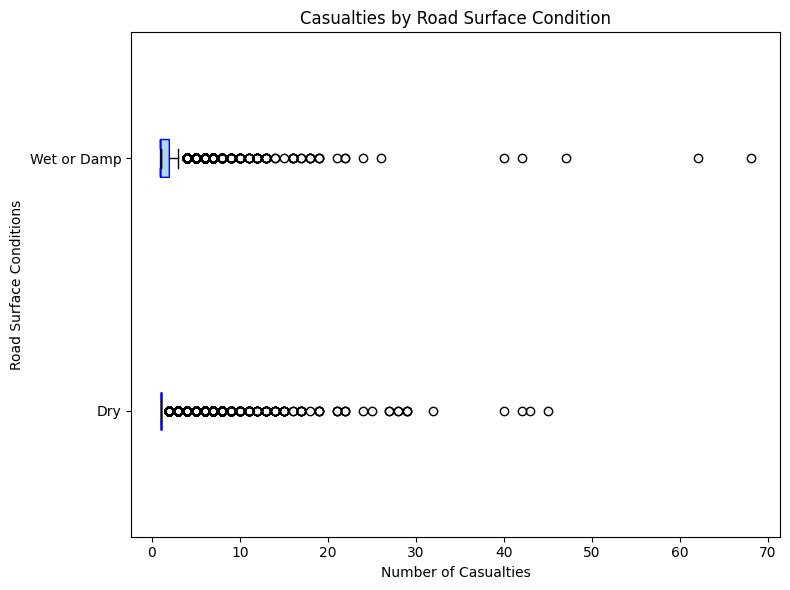

In [59]:
dry = accident[accident['Road_Surface_Conditions'] == 'Dry']['Number_of_Casualties']
wet = accident[accident['Road_Surface_Conditions'] == 'Wet or damp']['Number_of_Casualties']
f_stat, p_value = f_oneway(dry, wet)
print(p_value)


#ANOVA DAW SABI NI CHATGPT (to compare the means of the casualties under these two road surface conditions.)
f_stat, p_value = f_oneway(dry, wet)

print(f"P-value from ANOVA test: {p_value}")
if p_value < 0.05:
    print("There is a significant difference in the number of casualties between dry and wet road surfaces.")
else:
    print("There is no significant difference in the number of casualties between dry and wet road surfaces.")

plt.figure(figsize=(8, 6))
plt.boxplot([dry, wet], labels=['Dry', 'Wet or Damp'], patch_artist=True, notch=True, vert=False, 
            boxprops=dict(facecolor='lightblue', color='blue'), medianprops=dict(color='black'))

plt.title('Casualties by Road Surface Condition')
plt.xlabel('Number of Casualties')
plt.ylabel('Road Surface Conditions')
plt.tight_layout()
plt.show()